In [1]:
import os
import matplotlib.pyplot as plt
folder_path = r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET"
print(os.listdir(folder_path))


['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


clear skin: 300 images
Dark spots: 303 images
puffy eyes: 300 images
wrinkles: 300 images


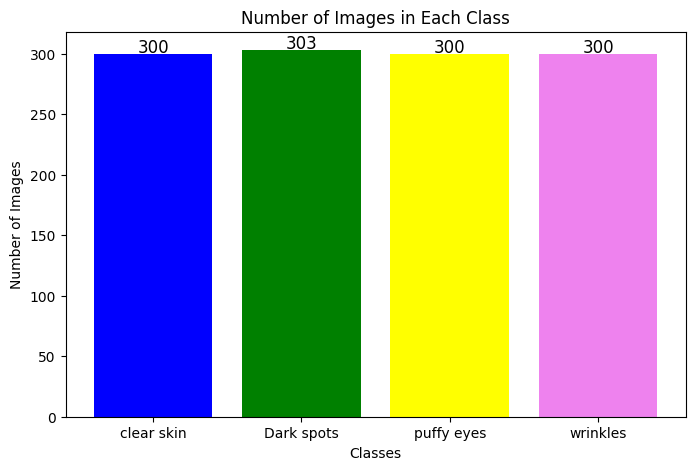

In [2]:

image_exts = (".jpg", ".jpeg", ".png", ".bmp", ".gif")
classes = ["clear skin","Dark spots","puffy eyes","wrinkles"]
counts = []

#image count
for c in classes:
    folder = os.path.join(folder_path, c)

    count = sum(
        1 for f in os.listdir(folder)
        if os.path.isfile(os.path.join(folder, f))
        and f.lower().endswith(image_exts)
    )

    counts.append(count)
    print(f"{c}: {count} images")
   

plt.figure(figsize=(8,5))

colors = ['blue', 'green', 'yellow', 'violet']

# bar chart
plt.bar(classes, counts, color=colors)

plt.title("Number of Images in Each Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")


for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

plt.show()

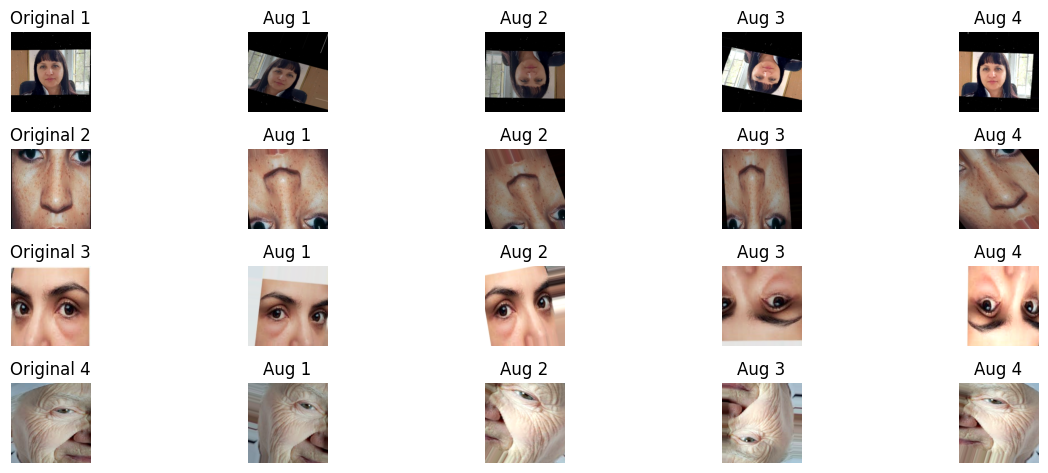

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
image_list = [
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\clear skin\clear_skin_061.jpg",
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\dark spots\2de295c0-801d-429e-8f74-fce181cc87cc.jpg", 
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\puffy eyes\14.jpg", 
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\wrinkles\36.jpg"
]

# Augmentation Configuration 
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    vertical_flip=True
)

#  Displaying Original + Augmented Images 
rows = 5        
cols = 5                         

plt.figure(figsize=(12, 6))

for row, img_list in enumerate(image_list):

    # Load image
    original = load_img(img_list, target_size=(224, 224))
    arr = img_to_array(original)
    arr = np.expand_dims(arr, axis=0)

    # Show Original Image 
    plt.subplot(rows, cols, row * cols + 1)
    plt.imshow(original)
    plt.title(f"Original {row+1}")
    plt.axis("off")

    # Show Augmented Versions 
    for j in range(4):
        augmented = next(aug.flow(arr, batch_size=1))[0].astype("uint8")
        plt.subplot(rows, cols, row * cols + (j + 2))
        plt.imshow(augmented)
        plt.title(f"Aug {j+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()